In [47]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sb

In [48]:
## Import data
data = pd.read_csv("D:\PROGRAMMING\DATASETS\Boston.csv")
print(data.shape)
data.head()

(506, 15)


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [49]:
(data.cov()).head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,21378.500000,512.381872,-352.578218,400.668663,-0.139604,6.755757,-8.215627,838.722871,-93.045936,873.364356,16427.306931,92.138119,-3938.380535,269.868842,-304.723960
crim,512.381872,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
zn,-352.578218,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
indus,400.668663,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
chas,-0.139604,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409


In [50]:
(data.corr()).head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260


<Axes: >

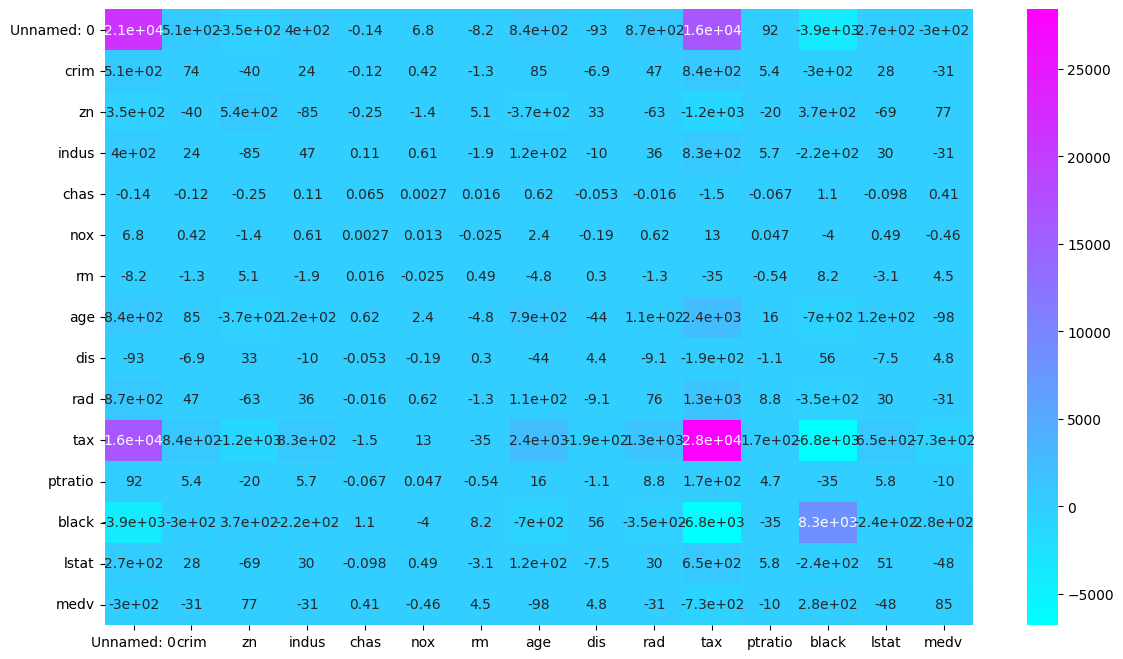

In [51]:
plt.figure(figsize=(14, 8))
sb.heatmap(data.cov(), annot=True, cmap='cool')

In [52]:
# Step 3: Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [53]:
## Compute covariance
cov_data = np.cov(scaled_data, rowvar=False)

In [54]:
## correlation
correlation_matrix = np.corrcoef(scaled_data, rowvar=False)

In [55]:
## pca
pca = PCA(n_components=6)
principal_components = pca.fit_transform(scaled_data)

In [56]:
components_names = [f"PC{k+1}" for k in range(principal_components.shape[1])]

df = pd.DataFrame(principal_components, columns=components_names)
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.413661,-0.147962,1.056532,0.925698,-0.667953,-0.174798
1,-1.727900,-1.032626,1.191758,0.086856,-0.574969,0.510569
2,-2.686689,0.368337,1.041905,-0.350262,-1.084469,0.870844
3,-3.132229,-0.101193,0.455444,-0.622050,-0.816924,1.150358
4,-3.068120,0.085918,0.602797,-0.585688,-0.919265,1.116967


In [57]:
def plot_variance(pca):
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Plot explained variance
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='b')
    plt.title('Explained Variance vs. Number of Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance')
    plt.grid(True)

    # Plot cumulative variance
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r')
    plt.title('Cumulative Explained Variance vs. Number of Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

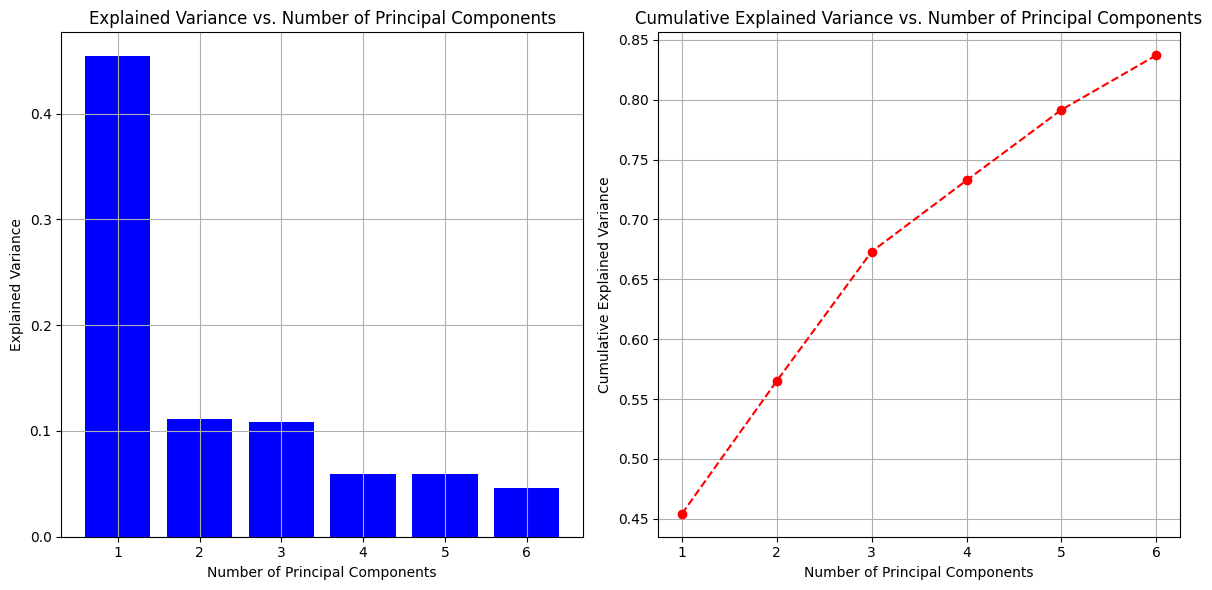

In [58]:
plot_variance(pca)

In [59]:
eigenvalues = pca.explained_variance_

In [60]:
eigenvectors = pca.components_

In [61]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.45411314 0.11092943 0.10806424 0.05952228 0.0589396  0.04559293]
